Omar Mancilla Martinez

# Proyecto Sprint 9: Prediccion de abandono de banco con Machine learning.

## Introducción.

Con la intención de retener a los clientes existentes, desarrollaremos un modelo de machine learning basado en el comportamiento de los clientes para determinar la probabilidad de que un cliente se abandone el banco.

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score, recall_score
from sklearn import tree
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
from sklearn.dummy import DummyClassifier


from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

### Objetivos:
Los objetivos de este notebook son:
- Analizar los datos de los clientes y preprocesar los datos de ser necesario.
    - Lidiar con duplicados y datos nulos.
    - Aplcar codificación y/o escalado de datos. 
    - Dividir el dataset en *entrenamiento*, *validación* y *prueba*.
- Examinar el desequilibrio de clases.
- Entrenar un modelo con las clases desequilibradas.
- Mejorar la calidad del modelo usando técnicas de balanceo de clases.
- Probar el modelo con la clase de prueba.


### Diccionario de datos:
**Características**

- *RowNumber*: índice de cadena de datos
- *CustomerId*: identificador de cliente nico
- *Surname*: apellido
- *CreditScore*: valor de crédito
- *Geography*: país de residencia
- *Gender*: sexo
- *Age*: edad
- *Tenure*: período durante el cual ha madurado el depósito a plazo fijo de un cliente (años)
- *Balance*: saldo de la cuenta
- *NumOfProducts*: número de productos bancarios utilizados por el cliente
- *HasCrCard*: el cliente tiene una tarjeta de crédito (1 - sí; 0 - no)
- *IsActiveMember*: actividad del cliente (1 - sí; 0 - no)
- *EstimatedSalary*: salario estimado

**Objetivo**

- *Exited*: El cliente se ha ido (1 - sí; 0 - no)

### Carga de datos:
caraga y exploración inicial

In [2]:
data=pd.read_csv('./datasets/churn.csv')
data.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8.0,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7.0,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4.0,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4.0,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2.0,134603.88,1,1,1,71725.73,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [4]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,9091.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,4.997690,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.894723,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,2.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


Notamos que:
- Existen datos nulos en "Tenure".
- Rownumber, customerID y Surname no son necesarios para el modelo de Machine learning.
- La media y mediana de edad coinciden aproximadamente, suponemos distribución gaussiana.
- El pais de origen (Geography) y el genero (gender) necesitan ser codificados.
- Las caracteristicas numericas deben ser escaladas.
- La media de "Exited" nos indica que el desbalance de clases es alrededor de 1:4
- tenemos diez caracteristicas (*CreditScore, Geography, gender,	Age,	Tenure,	Balance,	NumOfProducts,	HasCrCard,	IsActiveMember,	EstimatedSalary*) y un obejtivo (*Exited*).

## Preprocesamiento

### Datos nulos y duplicados
Revisaremos los datos nulos en "Ternure", codificaremos algunas observables y escalaremos las demas.


In [5]:
display(data[data.isnull().any(axis=1)])
display(data[data["Tenure"]==0])
#Averiguar tenure



,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
30,31,15589475,Azikiwe,591,Spain,Female,39,NaN,0.00,3,1,0,140469.38,1
48,49,15766205,Yin,550,Germany,Male,38,NaN,103391.38,1,0,1,90878.13,0
51,52,15768193,Trevisani,585,Germany,Male,36,NaN,146050.97,2,0,0,86424.57,0
53,54,15702298,Parkhill,655,Germany,Male,41,NaN,125561.97,1,0,0,164040.94,1
60,61,15651280,Hunter,742,Germany,Male,35,NaN,136857.00,1,0,0,84509.57,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9944,9945,15703923,Cameron,744,Germany,Male,41,NaN,190409.34,2,1,1,138361.48,0
9956,9957,15707861,Nucci,520,France,Female,46,NaN,85216.61,1,1,0,117369.52,1
9964,9965,15642785,Douglas,479,France,Male,34,NaN,117593.48,2,0,0,113308.29,0
9985,9986,15586914,Nepean,659,France,Male,36,NaN,123841.49,2,1,0,96833.00,0


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
29,30,15656300,Lucciano,411,France,Male,29,0.0,59697.17,2,1,1,53483.21,0
35,36,15794171,Lombardo,475,France,Female,45,0.0,134264.04,1,1,0,27822.99,1
57,58,15647091,Endrizzi,725,Germany,Male,19,0.0,75888.20,1,0,0,45613.75,0
72,73,15812518,Palermo,657,Spain,Female,37,0.0,163607.18,1,0,1,44203.55,0
127,128,15782688,Piccio,625,Germany,Male,56,0.0,148507.24,1,1,0,46824.08,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9793,9794,15772363,Hilton,772,Germany,Female,42,0.0,101979.16,1,1,0,90928.48,0
9799,9800,15722731,Manna,653,France,Male,46,0.0,119556.10,1,1,0,78250.13,1
9843,9844,15778304,Fan,646,Germany,Male,24,0.0,92398.08,1,1,1,18897.29,0
9868,9869,15587640,Rowntree,718,France,Female,43,0.0,93143.39,1,1,0,167554.86,0


Tras no encontrar una relación clara entre los datos nulos y considerando que conforman alrededor del 10% de los datos, decidimos retirarlos del dataframe, a la vez retiramos duplicados.

In [6]:
data.dropna(inplace=True)
data.drop_duplicates(inplace=True)
display(data[data.isnull().any(axis=1)])
#escalar observables numericas
#Retirar variables innecesarias
# #codificar variables categoricas


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited


### Separación de caracteristicas y objetivo:

Procedemos a declarar nuestras caracteristicas y objetivo:


In [7]:
features=data.drop(["Exited","RowNumber","CustomerId","Surname"],axis=1)
target=data["Exited"]
Numeric=["CreditScore","Age","Tenure","Balance","EstimatedSalary"]
Categories=["Geography","Gender"]


### Escalado y codificación de caracteristicas:

Procederemos a escalar las variables numericas y hacer codificacion *OHE*:

In [8]:
scaler = StandardScaler()
scaler.fit(features[Numeric])
features[Numeric]=scaler.transform(features[Numeric])

features=pd.get_dummies(features,drop_first=True)
features

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,-0.329200,0.289040,-1.035627,-1.227780,1,1,1,0.020264,False,False,False
1,-0.443301,0.194298,-1.381103,0.116887,1,0,1,0.214527,False,True,False
2,-1.542828,0.289040,1.037224,1.333920,3,1,0,0.238632,False,False,False
3,0.500631,0.004815,-1.381103,-1.227780,2,0,0,-0.110281,False,False,False
4,2.066937,0.383782,-1.035627,0.785996,1,1,1,-0.366132,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
9994,1.548293,-0.942603,-1.035627,-1.227780,2,0,0,1.173038,False,False,False
9995,1.247479,0.004815,0.000798,-1.227780,2,1,0,-0.067866,False,False,True
9996,-1.397607,-0.374153,1.728174,-0.307305,1,1,1,0.026354,False,False,True
9997,0.604360,-0.279411,0.691748,-1.227780,1,0,1,-1.008227,False,False,False


### División del dataset:
Debido a que no existe un dataset de prueba y que la cantidad de observaciones en el dataframe es suficiente, dividiremos el DF en tres:
- Entrenamiento: data_train 60%
- Validación: data_val 20%
- Prueba: data_test 20%

In [9]:

features_train, features_temp, target_train, target_temp = train_test_split(features, target, test_size=0.4, random_state=12345)

features_val, features_test, target_val, target_test = train_test_split(features_temp, target_temp, test_size=0.5, random_state=12345)


## Analisis de los datos 

### Generar modelos de machine learning con clases desbalanceadas:
Empezaremos determinando que tan desbalanceadas son las clases objetivo en el dataframe.

In [10]:
conteo_clases = data['Exited'].value_counts()
porcentaje_clases = conteo_clases / len(data) * 100
print("Conteo de clases:", conteo_clases)
print("Porcentaje de clases:", porcentaje_clases)


Conteo de clases: Exited
0    7237
1    1854
Name: count, dtype: int64
Porcentaje de clases: Exited
0    79.606204
1    20.393796
Name: count, dtype: float64


Tanto la media del "exited" como el conteo directo nos indican un fuerte desbalance en las clases que afectara el rendimiento de nuestros modelos de Machine Learning; iniciaremos generando un modelo entrenado con las clases desbalancedads para demostrar el impacto de las tecnicas de balance.

Debido a que nuestro objetivo es categorico, "1" o "0" para determinar si el cliente abandonó o no, requerimos un modelo de clasificación, para ello  generamos tres tipos de modelo: desicion tree, random forest y logistic regression; evaluaremos su implementación con distintos hiperparametros y decidiremos cual es aquel con mejor exactitud y sensibilidad, es decir, con mayor puntuaje F1.

#### Árbol de decisión de regresión



In [11]:
best_model = None
best_f1_tree = 0
best_depth = 0

for depth in range(1,50):
    model_tree=DecisionTreeClassifier(random_state=12345,max_depth=depth)
    model_tree.fit(features_train, target_train)
    predictions_valid =model_tree.predict(features_val)
    f1= f1_score(target_val, predictions_valid)
    if f1 > best_f1_tree:
        best_model_tree = model_tree
        best_f1_tree = f1
        best_depth = depth

print(f"F1 del mejor modelo en el conjunto de validación (max_depth = {best_depth}): {best_f1_tree}",
      "\n accuaracy:",accuracy_score(target_val, predictions_valid),"\n recall: ",recall_score(target_val, predictions_valid))
print(classification_report(target_val,predictions_valid))
print(confusion_matrix(target_val,predictions_valid))

F1 del mejor modelo en el conjunto de validación (max_depth = 7): 0.5764331210191083 
 accuaracy: 0.7904290429042904 
 recall:  0.493368700265252
              precision    recall  f1-score   support

           0       0.87      0.87      0.87      1441
           1       0.49      0.49      0.49       377

    accuracy                           0.79      1818
   macro avg       0.68      0.68      0.68      1818
weighted avg       0.79      0.79      0.79      1818

[[1251  190]
 [ 191  186]]


#### Bosque aleatorio de clasificación.


In [12]:
best_f1_forest= 0 
best_depth = 0
for est in range(1, 51, 1):
    for depth in range (1, 11):
        model = RandomForestClassifier(random_state=54321, n_estimators=est , max_depth=depth)
        model.fit(features_train,target_train) 
        predictions_valid = model.predict(features_val)
        f1 = f1_score(target_val, predictions_valid)
        if f1 > best_f1_forest:
            best_model_forest = model
            best_f1_forest = f1
            best_depth = depth
            best_est=est

print("F1 del mejor modelo en el conjunto de validación:", best_f1_forest, "n_estimators:", best_est, "best_depth:", best_depth,"\n accuaracy:",
      accuracy_score(target_val, predictions_valid),"\n recall: ",recall_score(target_val, predictions_valid))
print(classification_report(target_val,predictions_valid))
print(confusion_matrix(target_val,predictions_valid))

F1 del mejor modelo en el conjunto de validación: 0.5709342560553633 n_estimators: 48 best_depth: 10 
 accuaracy: 0.8624862486248625 
 recall:  0.4350132625994695
              precision    recall  f1-score   support

           0       0.87      0.97      0.92      1441
           1       0.82      0.44      0.57       377

    accuracy                           0.86      1818
   macro avg       0.84      0.70      0.74      1818
weighted avg       0.86      0.86      0.85      1818

[[1404   37]
 [ 213  164]]


#### Regresión logistica


In [13]:
model_logistic = LogisticRegression()# inicializa el constructor de modelos
model_logistic.fit(features_train, target_train) # entrena el modelo en el conjunto de entrenamiento
predictions_valid = model_logistic.predict(features_val) # obtén las predicciones del modelo en el conjunto de validación

best_f1_logistic = f1_score(target_val, predictions_valid)
print("El puntuaje F1 del modelo de regresión logistica en el conjunto de validación es:", best_f1_logistic,"\n accuaracy:",
      accuracy_score(target_val, predictions_valid),"\n recall: ",recall_score(target_val, predictions_valid))
print(classification_report(target_val,predictions_valid))
print(confusion_matrix(target_val,predictions_valid))

El puntuaje F1 del modelo de regresión logistica en el conjunto de validación es: 0.3033932135728543 
 accuaracy: 0.8080308030803081 
 recall:  0.20159151193633953
              precision    recall  f1-score   support

           0       0.82      0.97      0.89      1441
           1       0.61      0.20      0.30       377

    accuracy                           0.81      1818
   macro avg       0.72      0.58      0.60      1818
weighted avg       0.78      0.81      0.77      1818

[[1393   48]
 [ 301   76]]


#### Modelo Dummy

In [14]:
dummy_clf = DummyClassifier(strategy="prior")
dummy_clf.fit(features_train, target_train)
predictions_dummy = dummy_clf.predict(features_val)

f1_dummy = f1_score(target_val, predictions_dummy)
print("El puntuaje F1 del modelo Dummy en el conjunto de validación es:", f1_dummy, "\n accuaracy:",
      accuracy_score(target_val, predictions_dummy), "\n recall: ", recall_score(target_val, predictions_dummy))

El puntuaje F1 del modelo Dummy en el conjunto de validación es: 0.0 
 accuaracy: 0.7926292629262927 
 recall:  0.0


### Evaluación de los modelos con clases desbalanceadas:
Mostraremos los puntuajes F1 de los 4 modelos probados:



In [15]:
display("arbol de clasificación",best_f1_tree,"bosque aleatorio",best_f1_forest,"regresion logistica",best_f1_logistic, "Modelo Dummy", f1_dummy)

'arbol de clasificación'

0.5764331210191083

'bosque aleatorio'

0.5709342560553633

'regresion logistica'

0.3033932135728543

'Modelo Dummy'

0.0

Vemos que ninguno de los tres modelos tiene un puntuaje aceptable, pese a que la precisión es relativamente alta: $precision=0.79$, la sensibilidad es baja:  $recall=0.49$, dando un puntuaje F1 insuficiente: $F1=0.58$

#### Curvas ROC y PR:

Podemos ver las curvas ROC y PR del modelo con el mayor puntuaje F1, el arbol de desición:



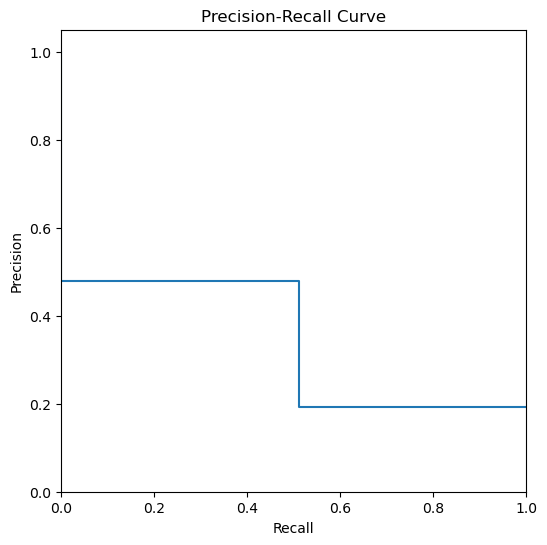

AUC-PR: 0.5422108602567477


In [16]:
probabilities_test = model_tree.predict_proba(features_test)
precision, recall, thresholds = precision_recall_curve(
    target_test, probabilities_test[:, 1]
)

plt.figure(figsize=(6, 6))
plt.step(recall, precision, where='post')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall Curve')
plt.show()
print("AUC-PR:", auc(recall,precision))

Vemos que para cualquier sensibilidad, la precisíon es bastante baja.

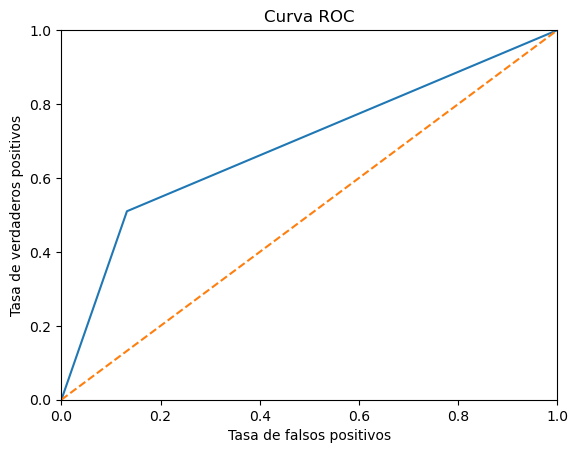

roc accuracy score: 0.6889094607078259


In [17]:
probabilities_one_test = probabilities_test[:, 1]

fpr, tpr, thresholds =  roc_curve(target_test, probabilities_one_test)# < escribe el código aquí >

plt.figure()
plt.plot(fpr, tpr)

# Curva ROC para modelo aleatorio (parece una línea recta)
plt.plot([0, 1], [0, 1], linestyle='--')


plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel("Tasa de falsos positivos") 
plt.ylabel("Tasa de verdaderos positivos")
plt.title("Curva ROC")
plt.show()
print("roc accuracy score:",roc_auc_score(target_test, probabilities_one_test))

Observamos como nuestro modelo de arbol de decisión no consigue una tasa de veredaderos positivos suficiente, estando alejado de la esquina superior izquierda; junto con un valor roc-auc relativamente bajo: $roc-auc=0.69$



Debido al fuerte desbalance de clases (80/20), el entrenamiento de los modelos es ineficiente y estos no pueden identificar corretamente la clase subrepresentada.

Para mitigar el efecto del desbalance de clases usaremos los siguientes metodos:

- sobremuestreo
- ajuste de peso de clase

### Generación de modelos con clases balanceadas:

Iniciaremos con el sobremuestreo, debido a que la relación es aproximadamente 80/20, usaremos un factor de 4 para la clase subrepresentada.

- Para ello definiremos una función de sobremuestreo (upsample)-
- posteriormente volveremos a hacer la división de datos en "train", "val" y "test".
- Finalmente corroboraremos que las clases esten relativamente balanceadas.

In [18]:
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)

    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345
    )

    return features_upsampled, target_upsampled

In [19]:
features_upsampled, target_upsampled = upsample(
    features_train, target_train, 4 )

features_train, features_temp, target_train, target_temp = train_test_split(features_upsampled, target_upsampled, test_size=0.4, random_state=12345)

features_val, features_test, target_val, target_test = train_test_split(features_temp, target_temp, test_size=0.5, random_state=12345)

In [20]:
conteo_clases = pd.concat([target_train, target_test, target_val]).value_counts()
porcentaje_clases = conteo_clases / len(pd.concat([target_train, target_test, target_val])) * 100
print("Conteo de clases:", conteo_clases)
print("Porcentaje de clases:", porcentaje_clases)

Conteo de clases: Exited
1    4504
0    4328
Name: count, dtype: int64
Porcentaje de clases: Exited
1    50.996377
0    49.003623
Name: count, dtype: float64


Ahora usaremos el parametro "*class_weight*" en los modelos para ajustar el peso de clase.

#### Arbol de clasificación de regresión:


In [21]:
best_model = None
best_f1_tree = 0
best_depth = 0

for depth in range(1,50):
    model_tree=DecisionTreeClassifier(random_state=12345,max_depth=depth, class_weight="balanced")
    model_tree.fit(features_train, target_train)
    predictions_valid =model_tree.predict(features_val)
    f1= f1_score(target_val, predictions_valid)
    if f1 > best_f1_tree:
        best_model_tree = model_tree
        best_f1_tree = f1
        best_depth = depth

print(f"F1 del mejor modelo en el conjunto de validación (max_depth = {best_depth}): {best_f1_tree}",
      "\n accuaracy:",accuracy_score(target_val, predictions_valid),"\n recall: ",recall_score(target_val, predictions_valid))
print(classification_report(target_val,predictions_valid))
display(confusion_matrix(target_val,predictions_valid))

F1 del mejor modelo en el conjunto de validación (max_depth = 17): 0.9087158329035585 
 accuaracy: 0.8958097395243488 
 recall:  0.9778024417314095
              precision    recall  f1-score   support

           0       0.97      0.81      0.88       865
           1       0.84      0.98      0.91       901

    accuracy                           0.90      1766
   macro avg       0.91      0.89      0.89      1766
weighted avg       0.91      0.90      0.89      1766

[[701 164]
 [ 20 881]]


#### Bosque aleatorio de clasificación.


In [22]:
best_f1_forest= 0 
best_depth = 0
for est in range(1, 51, 1):
    for depth in range (1, 11):
        model_forest = RandomForestClassifier(random_state=54321, n_estimators=est , max_depth=depth, class_weight="balanced")# inicializa el constructor de modelos con los parámetros random_state=54321, n_estimators=est y max_depth=depth
        model_forest.fit(features_train,target_train) # entrena el modelo en el conjunto de entrenamiento
        predictions_valid = model_forest.predict(features_val) # obtén las predicciones del modelo en el conjunto de validación
        f1 = f1_score(target_val, predictions_valid)
        if f1 > best_f1_forest:
            best_model_forest = model_forest
            best_f1_forest = f1
            best_depth = depth
            best_est=est

print("F1 del mejor modelo en el conjunto de validación:", best_f1_forest, "n_estimators:", best_est, "best_depth:", best_depth,"\n accuaracy:",
      accuracy_score(target_val, predictions_valid),"\n recall: ",recall_score(target_val, predictions_valid))
print(classification_report(target_val,predictions_valid))
print(confusion_matrix(target_val,predictions_valid))

F1 del mejor modelo en el conjunto de validación: 0.8634119583104772 n_estimators: 49 best_depth: 10 
 accuaracy: 0.8584371460928653 
 recall:  0.8712541620421753
              precision    recall  f1-score   support

           0       0.86      0.85      0.85       865
           1       0.85      0.87      0.86       901

    accuracy                           0.86      1766
   macro avg       0.86      0.86      0.86      1766
weighted avg       0.86      0.86      0.86      1766

[[731 134]
 [116 785]]


#### Regresión logistica


In [23]:
model_logistic = LogisticRegression(random_state=12345, solver='liblinear',class_weight="balanced")# inicializa el constructor de modelos
model_logistic.fit(features_train, target_train) # entrena el modelo en el conjunto de entrenamiento
predictions_valid = model_logistic.predict(features_val) # obtén las predicciones del modelo en el conjunto de validación

best_f1_logistic = f1_score(target_val, predictions_valid)
print("El puntuaje F1 del modelo de regresión logistica en el conjunto de validación es:", best_f1_logistic,"\n accuaracy:",
      accuracy_score(target_val, predictions_valid),"\n recall: ",recall_score(target_val, predictions_valid))
print(classification_report(target_val,predictions_valid))
print(confusion_matrix(target_val,predictions_valid))

El puntuaje F1 del modelo de regresión logistica en el conjunto de validación es: 0.6823125357756153 
 accuaracy: 0.6857304643261608 
 recall:  0.6614872364039955
              precision    recall  f1-score   support

           0       0.67      0.71      0.69       865
           1       0.70      0.66      0.68       901

    accuracy                           0.69      1766
   macro avg       0.69      0.69      0.69      1766
weighted avg       0.69      0.69      0.69      1766

[[615 250]
 [305 596]]


#### Modelo Dummy

In [24]:
dummy_clf = DummyClassifier(strategy="prior")
dummy_clf.fit(features_train, target_train)
predictions_dummy = dummy_clf.predict(features_val)

f1_dummy = f1_score(target_val, predictions_dummy)
print("El puntuaje F1 del modelo Dummy en el conjunto de validación es:", f1_dummy, "\n accuaracy:",
      accuracy_score(target_val, predictions_dummy), "\n recall: ", recall_score(target_val, predictions_dummy))

El puntuaje F1 del modelo Dummy en el conjunto de validación es: 0.6756655418072741 
 accuaracy: 0.5101925254813137 
 recall:  1.0


### Evaluación de los modelos con clases balanceadas:
Mostraremos los puntuajes F1 de los 4 modelos probados:



In [25]:
display("arbol de clasificación",best_f1_tree,"bosque aleatorio",best_f1_forest,"regresion logistica",best_f1_logistic,"Modelo Dummy:",f1_dummy)

'arbol de clasificación'

0.9087158329035585

'bosque aleatorio'

0.8634119583104772

'regresion logistica'

0.6823125357756153

'Modelo Dummy:'

0.6756655418072741

Notamos que el modelo de **"Arból de clasificación"** fue aquel con mejor puntuaje, profundizaremos en los resultados que genera y lo evaluaremos con datos nunca antes vistos:

### Exploración del **Arbol de clasificación**


#### Puntuajes:

Exploramos F1, recall, precisión, la matriz de confución de nuestro mejor modelo con los datos de prueba:

In [26]:
predictions_test =model_tree.predict(features_test)
print("f1:",f1_score(target_test, predictions_test) ,"\n accuaracy:",accuracy_score(target_test, predictions_test),"\n recall: ",recall_score(target_test, predictions_test))
print(classification_report(target_test,predictions_test))
print( "Matriz de confusión:\n", confusion_matrix(target_test,predictions_test))

f1: 0.9030585795749093 
 accuaracy: 0.8941709111488398 
 recall:  0.9731843575418995
              precision    recall  f1-score   support

           0       0.97      0.81      0.88       872
           1       0.84      0.97      0.90       895

    accuracy                           0.89      1767
   macro avg       0.90      0.89      0.89      1767
weighted avg       0.90      0.89      0.89      1767

Matriz de confusión:
 [[709 163]
 [ 24 871]]


Notamos una sustancial mejoria en el modelo, conun valor F1 de $0.90$, compuesto por una sensibilidad de $0.97$ y una exactitud de $0.89$.

Notamos que el modelo tiende a tener mas falsos positivos que falsos negativos; en el contexto del banco esto implica intentar retener clientela que no planeaba abandonar y relativamente pocos casos de clientes que abandonan sin ser previstos.

#### Curva PR
Esta curva muestra la relación entre la precisión  y el recall  para diferentes umbrales de decisión.


Un AUC-PR más cercano a 1 indica un mejor rendimiento del modelo en términos de precisión y recall.



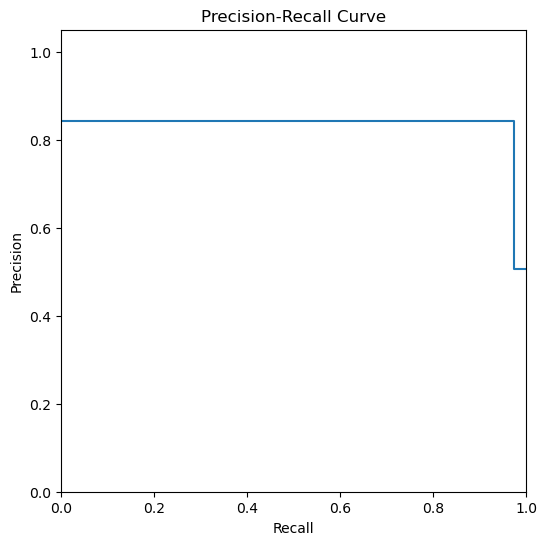

AUC-PR: 0.914563234193871


In [27]:
probabilities_test = model_tree.predict_proba(features_test)
precision, recall, thresholds = precision_recall_curve(
    target_test, probabilities_test[:, 1]
)

plt.figure(figsize=(6, 6))
plt.step(recall, precision, where='post')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall Curve')
plt.show()
print("AUC-PR:", auc(recall,precision))

#### Curva ROC
Representación de la relación entre la tasa de verdaderos positivos (TPR) y la tasa de falsos positivos (FPR) para el modelo.


 El valor AUC-ROC proporciona una métrica de rendimiento del modelo. 
 
 Un AUC-ROC más cercano a 1 indica un mejor rendimiento del modelo.


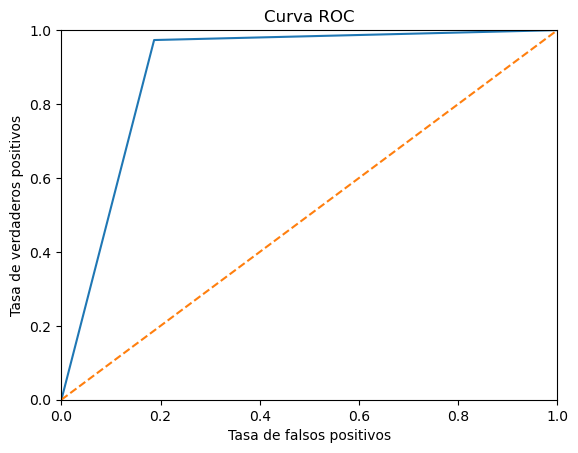

roc accuracy score: 0.8931288760186562


In [28]:
probabilities_one_test = probabilities_test[:, 1]

fpr, tpr, thresholds =  roc_curve(target_test, probabilities_one_test)# < escribe el código aquí >

plt.figure()
plt.plot(fpr, tpr)

# Curva ROC para modelo aleatorio (parece una línea recta)
plt.plot([0, 1], [0, 1], linestyle='--')


plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel("Tasa de falsos positivos") 
plt.ylabel("Tasa de verdaderos positivos")
plt.title("Curva ROC")
plt.show()
print("roc accuracy score:",roc_auc_score(target_test, probabilities_one_test))

Podemos coomparar el puntuaje de precisión ROC: $0.89$ con el puntuaje F1: $0.91$, viendo que ambas medidas son altas podemos concluir que:
- nuestro modelo tiene una alta capacidad de detectar verdaderos positivos (precisión)
- se detectan la mayoría de las instancias positivas (recall).
- Es capaz de clasificar correctamente la mayoría de las instancias positivas y negativas. (AUC-ROC)

# Concluciones

Podemos notar:
- El modelo optimo fue un arbol de decisión. El cual se entrena con relativa facilidad consumiendo menos recursos que entrenar un bosque pese a que tenga una profundidad relativamente alta (17).
- Un claro aumento de las metricas relevantes:
    - puntuaje F1 de $0.57$ a $0.90 $
    - puntuaje ROC-AUC de $0.69$ a $0.89$
    - puntuaje PR-AUC de $0.54$ a $0.91$

    Estas mejoras debidas a entrenar el modelo de arbol de decisión con dos metodos para mitigar el desbalance de clases, sobremuestreo de la clase subrepresentada y ajuste de peso de las clases en el modelo entrenado.

- El modelo tiende a tener mas falsos positivos que falsos negativos: En el contexto del banco esto implica que habra mas clientes que no planeaban abandonaar el banco al que se le den incentivos de quedarse, de lo que habran clientes que abanonen sin que sea previsto.